In [4]:
import pandas as pd

df = pd.read_csv('Downloads/retail_sales_dataset.csv')

df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [8]:
total_sales_per_category = df.groupby('Product Category')['Total Amount'].sum().reset_index()

total_sales_per_category

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


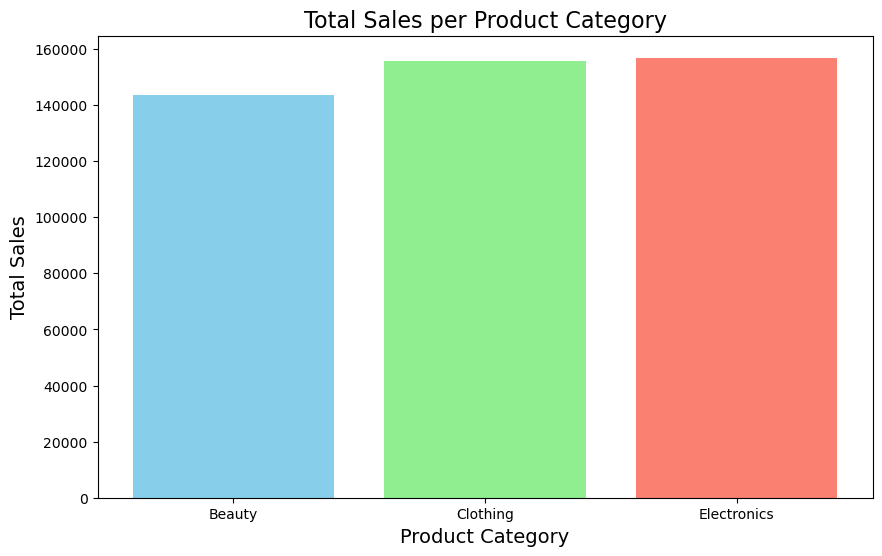

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=total_sales_per_category)
plt.bar(total_sales_per_category['Product Category'], total_sales_per_category['Total Amount'], color=['skyblue', 'lightgreen', 'salmon'])

plt.title('Total Sales per Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

plt.show()

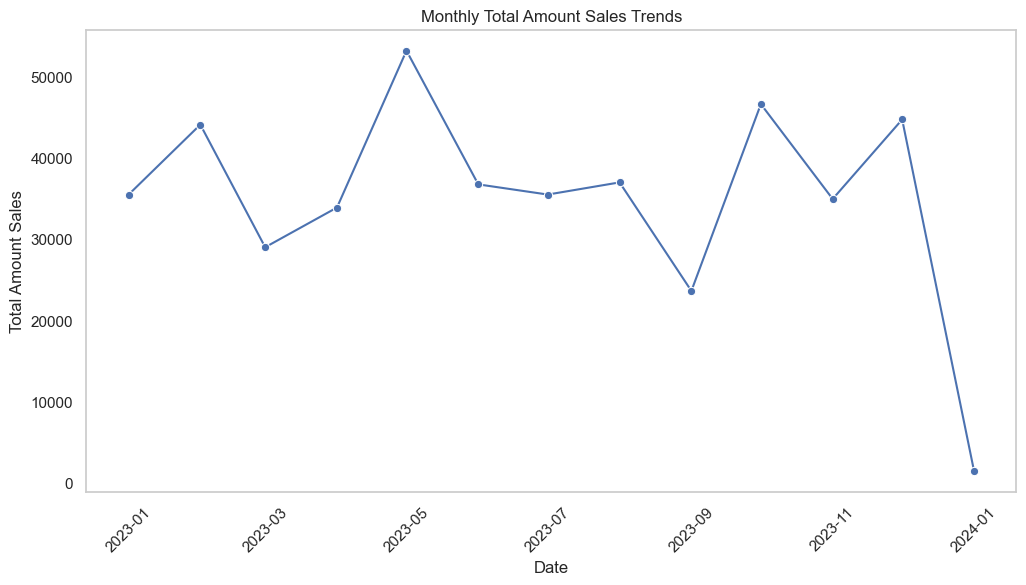

In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total Amount', data=monthly_sales, marker='o')
plt.title('Monthly Total Amount Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

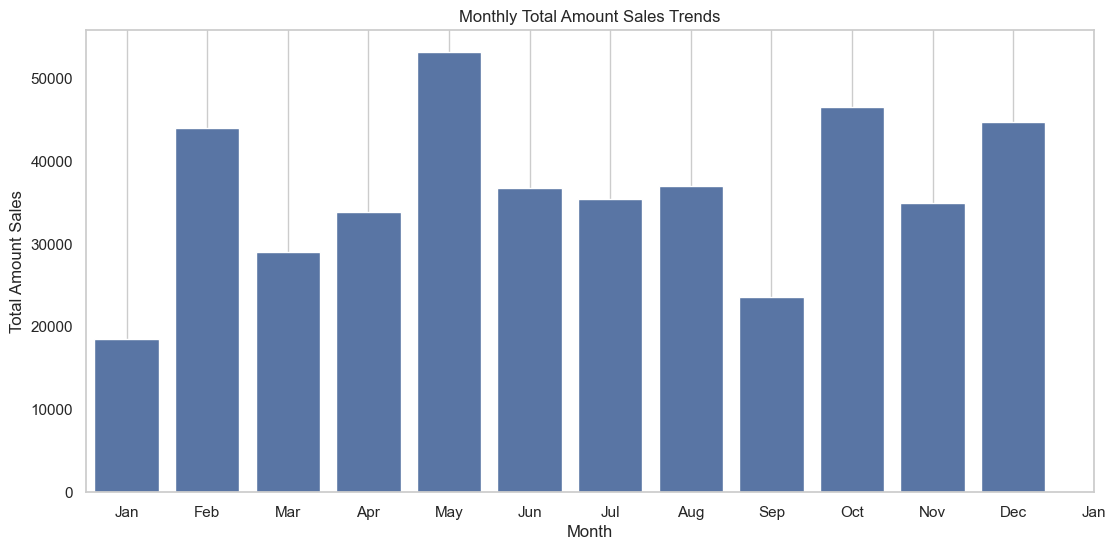

In [30]:
monthly_sales['Month'] = monthly_sales['Date'].dt.month
seasonal_sales = monthly_sales.groupby('Month')['Total Amount'].mean().reset_index()

plt.figure(figsize=(13, 6))
sns.barplot(x='Month', y='Total Amount', data=seasonal_sales)
plt.title('Monthly Total Amount Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Amount Sales')
plt.xticks(ticks=range(13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan'])
plt.grid()
plt.show()

In [54]:
min = df['Total Amount'].min()

min

25

In [58]:
max = df['Total Amount'].max()

max

2000

In [76]:
range_interval = (max - min)//3

print(f"Low Spenders :  {min} to {min + range_interval}") 

minmed = min + range_interval
maxmed = minmed + range_interval

print(f"Medium Spenders : {minmed + 1} to {maxmed}")

print(f"High Spenders : {maxmed + 1} to {max}")

Low Spenders :  25 to 683
Medium Spenders : 684 to 1341
High Spenders : 1342 to 2000


In [90]:
categories = ['Low Spenders', 'Medium Spenders', 'High Spenders']

df['Spender Category'] = pd.cut(df['Total Amount'], 
                                 bins=[min-1, min + range_interval, maxmed, max],
                                 labels=categories,
                                 right=True)

spender_counts = df['Spender Category'].value_counts()

spender_counts

Spender Category
Low Spenders       736
Medium Spenders    165
High Spenders       99
Name: count, dtype: int64

C:\Users\john\AppData\Local\Temp\ipykernel_9088\808757126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spender_counts.index, y=spender_counts.values, palette='viridis')


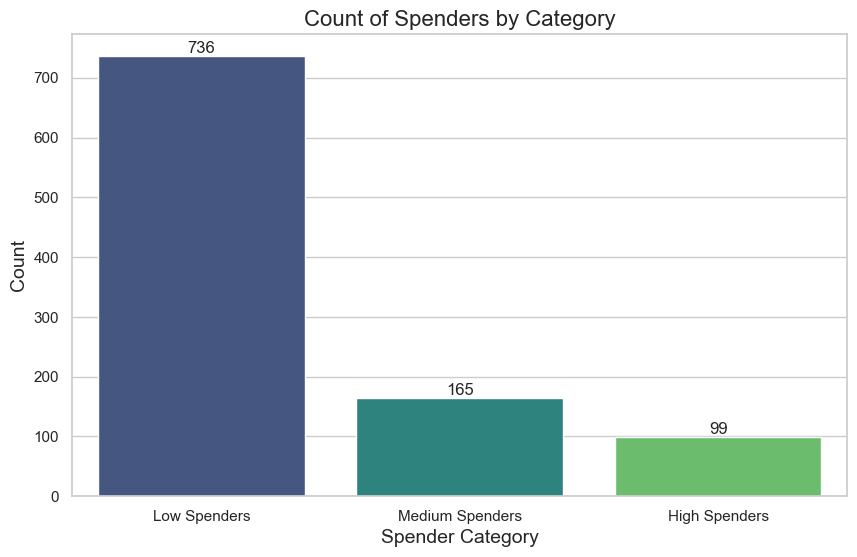

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x=spender_counts.index, y=spender_counts.values, palette='viridis')

plt.title('Count of Spenders by Category', fontsize=16)
plt.xlabel('Spender Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

for index, value in enumerate(spender_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)

plt.show()


In [220]:
import pandas as pd

df = pd.read_csv('Downloads/StudentsPerformance_with_headers.csv')

df

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [186]:
grade_labels = {
    0: 'Fail',
    1: 'DD',
    2: 'DC',
    3: 'CC',
    4: 'CB',
    5: 'BB',
    6: 'BA',
    7: 'AA'
}

df['Grade Label'] = df['GRADE'].map(grade_labels)

df

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE,Grade Label
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,3,2,1,2,1,1,1,1,DD
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,3,2,3,2,2,3,1,1,DD
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,2,2,1,1,2,2,1,1,DD
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,3,2,2,1,3,2,1,1,DD
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,2,2,2,1,2,2,1,1,DD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,2,1,2,1,3,3,9,5,BB
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,3,2,2,1,5,3,9,5,BB
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,3,3,2,1,4,3,9,1,DD
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,2,1,2,1,5,3,9,4,CB


In [188]:
student_averages = df.groupby('STUDENT ID')['GRADE'].mean().reset_index()
student_averages.columns = ['STUDENT ID', 'AVERAGE SCORE']

print("Average Score for Each Student:")
print(student_averages)

Average Score for Each Student:
     STUDENT ID  AVERAGE SCORE
0      STUDENT1            1.0
1     STUDENT10            0.0
2    STUDENT100            7.0
3    STUDENT101            6.0
4    STUDENT102            7.0
..          ...            ...
140   STUDENT95            6.0
141   STUDENT96            5.0
142   STUDENT97            7.0
143   STUDENT98            6.0
144   STUDENT99            7.0

[145 rows x 2 columns]


In [142]:
subject_averages = df.groupby('COURSE ID')['GRADE'].mean().reset_index()
subject_averages.columns = ['COURSE ID', 'AVERAGE SCORE']

print("Overall Average Score for Each Subject:")
print(subject_averages)

Overall Average Score for Each Subject:
   COURSE ID  AVERAGE SCORE
0          1       2.287879
1          2       3.000000
2          3       6.125000
3          4       4.500000
4          5       5.285714
5          6       5.875000
6          7       6.333333
7          8       1.357143
8          9       2.190476


In [190]:
best_subject = subject_averages.loc[subject_averages['AVERAGE SCORE'].idxmax()]

print("Best Performing Subject:")
print(f"Course ID: {best_subject['COURSE ID']}, Average Score: {best_subject['AVERAGE SCORE']:.2f}")

Best Performing Subject:
Course ID: 7.0, Average Score: 6.33


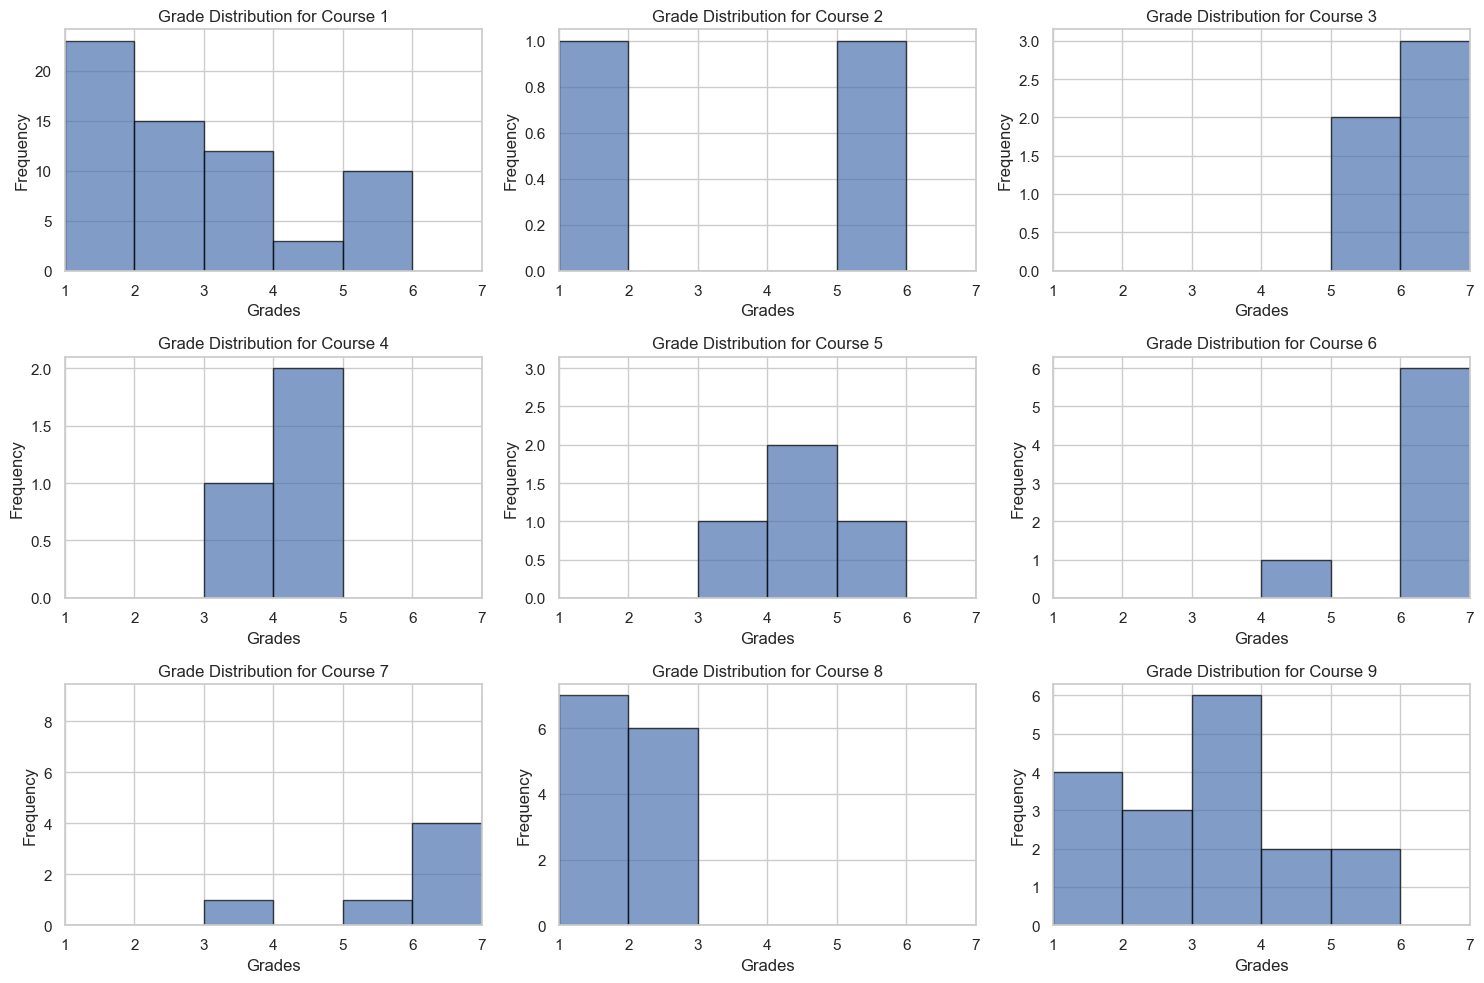

In [192]:
plt.figure(figsize=(15, 10))

courses = df['COURSE ID'].unique()
for course in courses:
    plt.subplot(3, 3, course)
    course_data = df[df['COURSE ID'] == course]['GRADE']
    
    plt.hist(course_data, bins=range(1, 9), edgecolor='black', alpha=0.7)
    plt.title(f'Grade Distribution for Course {course}')
    plt.xlabel('Grades')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 8))
    plt.xlim(1, 7)

plt.tight_layout()
plt.show()

In [194]:
passing_grade = 4

consistently_low_students = df.groupby('STUDENT ID')['GRADE'].apply(lambda x: all(grade < passing_grade for grade in x))

low_performers = consistently_low_students[consistently_low_students].index.tolist()

print("Students consistently scoring below 50% in all subjects:")

print(low_performers)

Students consistently scoring below 50% in all subjects:
['STUDENT1', 'STUDENT10', 'STUDENT105', 'STUDENT11', 'STUDENT111', 'STUDENT112', 'STUDENT113', 'STUDENT114', 'STUDENT115', 'STUDENT116', 'STUDENT117', 'STUDENT118', 'STUDENT119', 'STUDENT12', 'STUDENT120', 'STUDENT121', 'STUDENT122', 'STUDENT123', 'STUDENT124', 'STUDENT125', 'STUDENT126', 'STUDENT127', 'STUDENT128', 'STUDENT129', 'STUDENT13', 'STUDENT130', 'STUDENT131', 'STUDENT133', 'STUDENT134', 'STUDENT135', 'STUDENT136', 'STUDENT137', 'STUDENT138', 'STUDENT139', 'STUDENT14', 'STUDENT140', 'STUDENT143', 'STUDENT145', 'STUDENT15', 'STUDENT16', 'STUDENT17', 'STUDENT18', 'STUDENT19', 'STUDENT2', 'STUDENT20', 'STUDENT21', 'STUDENT22', 'STUDENT23', 'STUDENT24', 'STUDENT25', 'STUDENT26', 'STUDENT27', 'STUDENT28', 'STUDENT29', 'STUDENT3', 'STUDENT32', 'STUDENT33', 'STUDENT34', 'STUDENT35', 'STUDENT36', 'STUDENT37', 'STUDENT38', 'STUDENT39', 'STUDENT4', 'STUDENT40', 'STUDENT41', 'STUDENT42', 'STUDENT43', 'STUDENT45', 'STUDENT46', 'STU

### More EDA for the prediction model

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 34 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   STUDENT ID                                                         145 non-null    object
 1   Student Age                                                        145 non-null    int64 
 2   Sex                                                                145 non-null    int64 
 3   Graduated high-school type                                         145 non-null    int64 
 4   Scholarship type                                                   145 non-null    int64 
 5   Additional work                                                    145 non-null    int64 
 6   Regular artistic or sports activity                                145 non-null    int64 
 7   Do you have a partner              

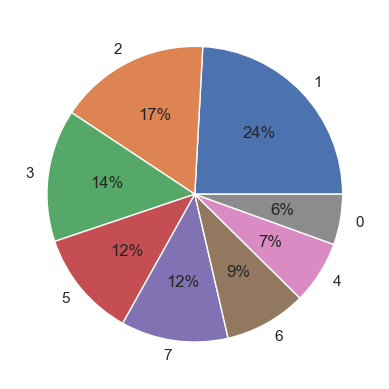

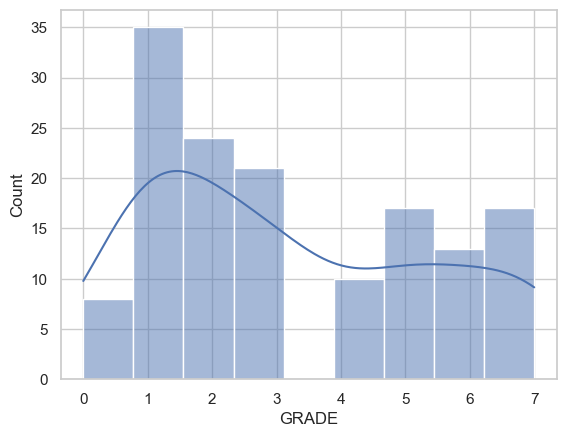

In [198]:
grades = df['GRADE'].value_counts()
plt.pie(grades.values, labels=grades.index, autopct='%.0f%%')
plt.show()
sorted_df = df.sort_values(by='GRADE', ascending=False)
sns.histplot(sorted_df, x='GRADE', kde=True)
plt.show()

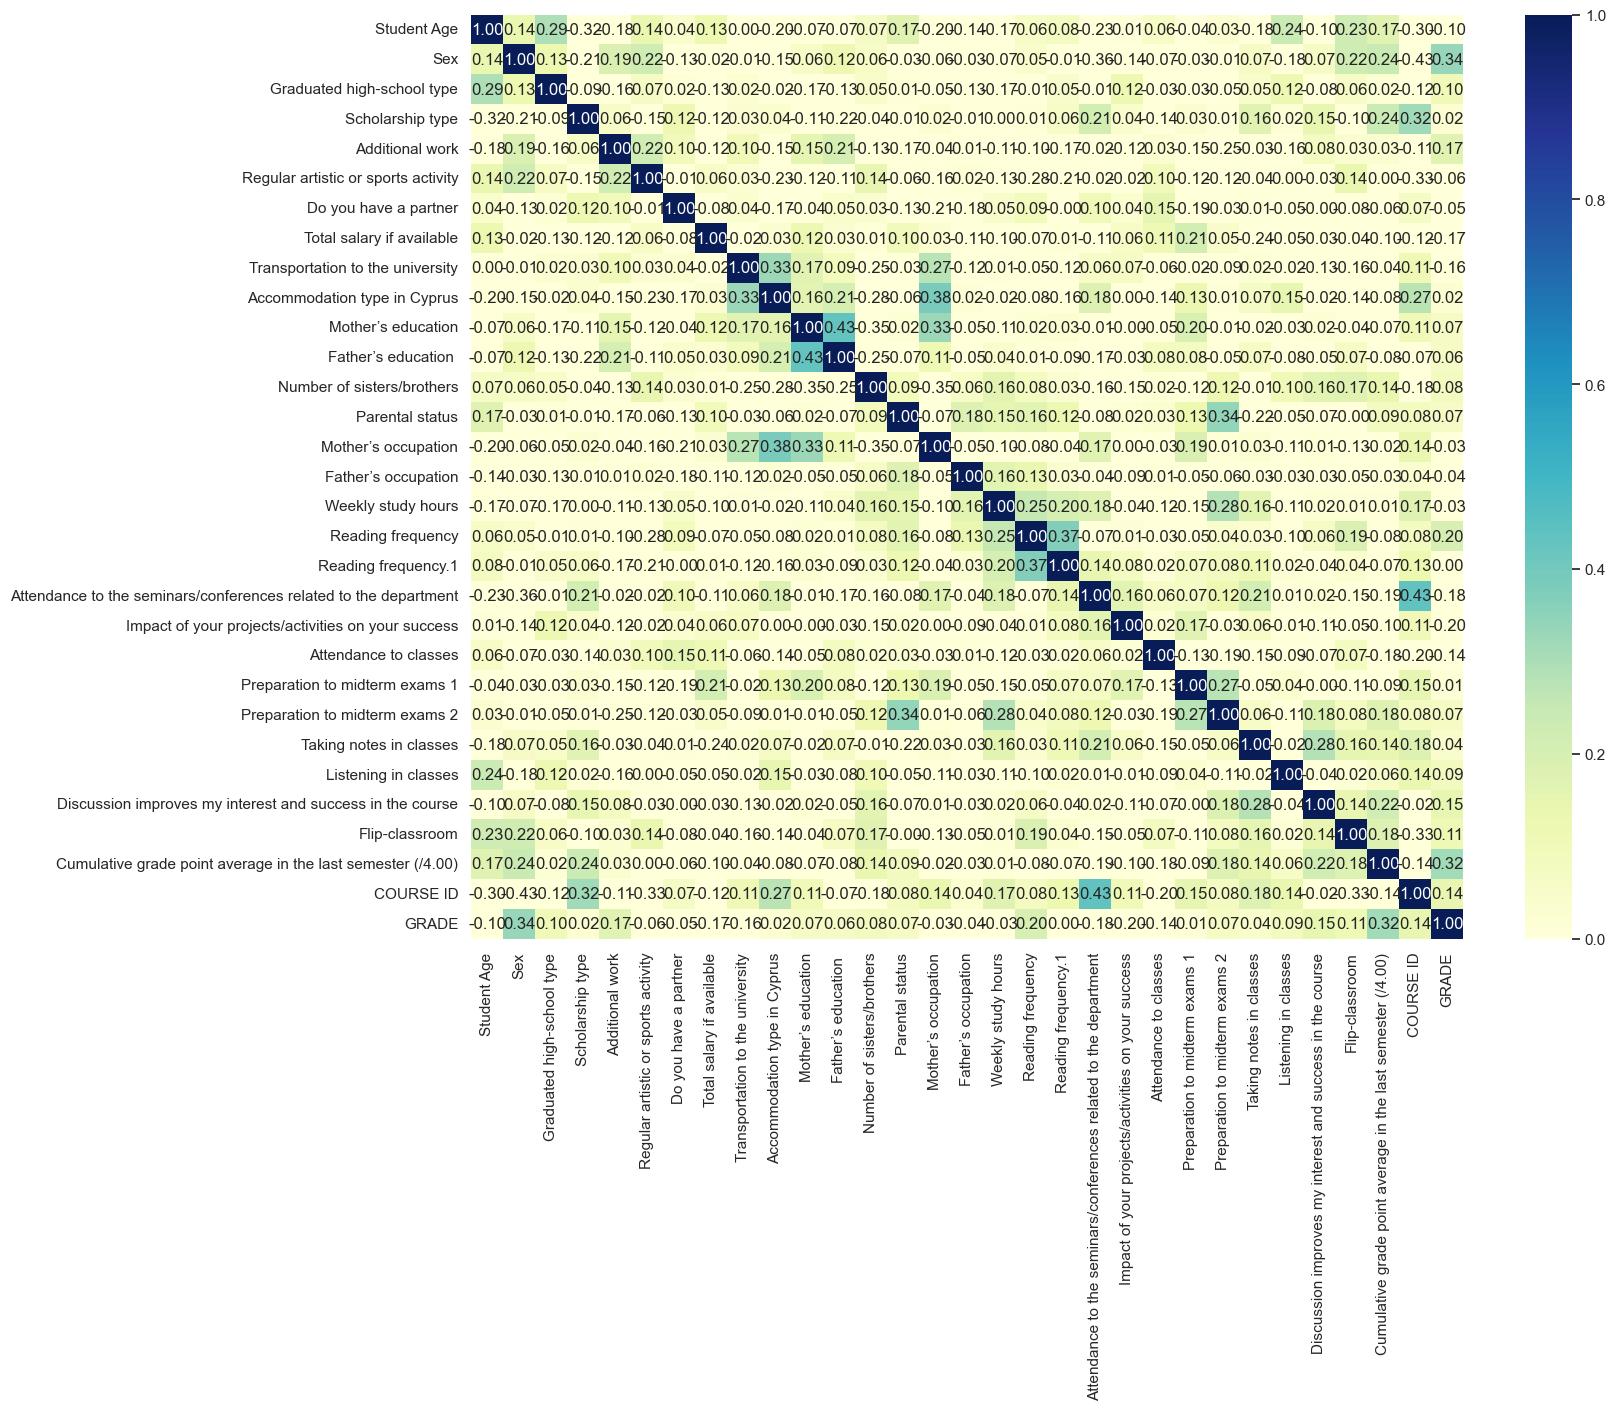

In [222]:
df.drop(columns='STUDENT ID', inplace=True)

plt.figure(figsize=(16, 12))
sns.heatmap(df.drop('Expected Cumulative grade point average in the graduation (/4.00)', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

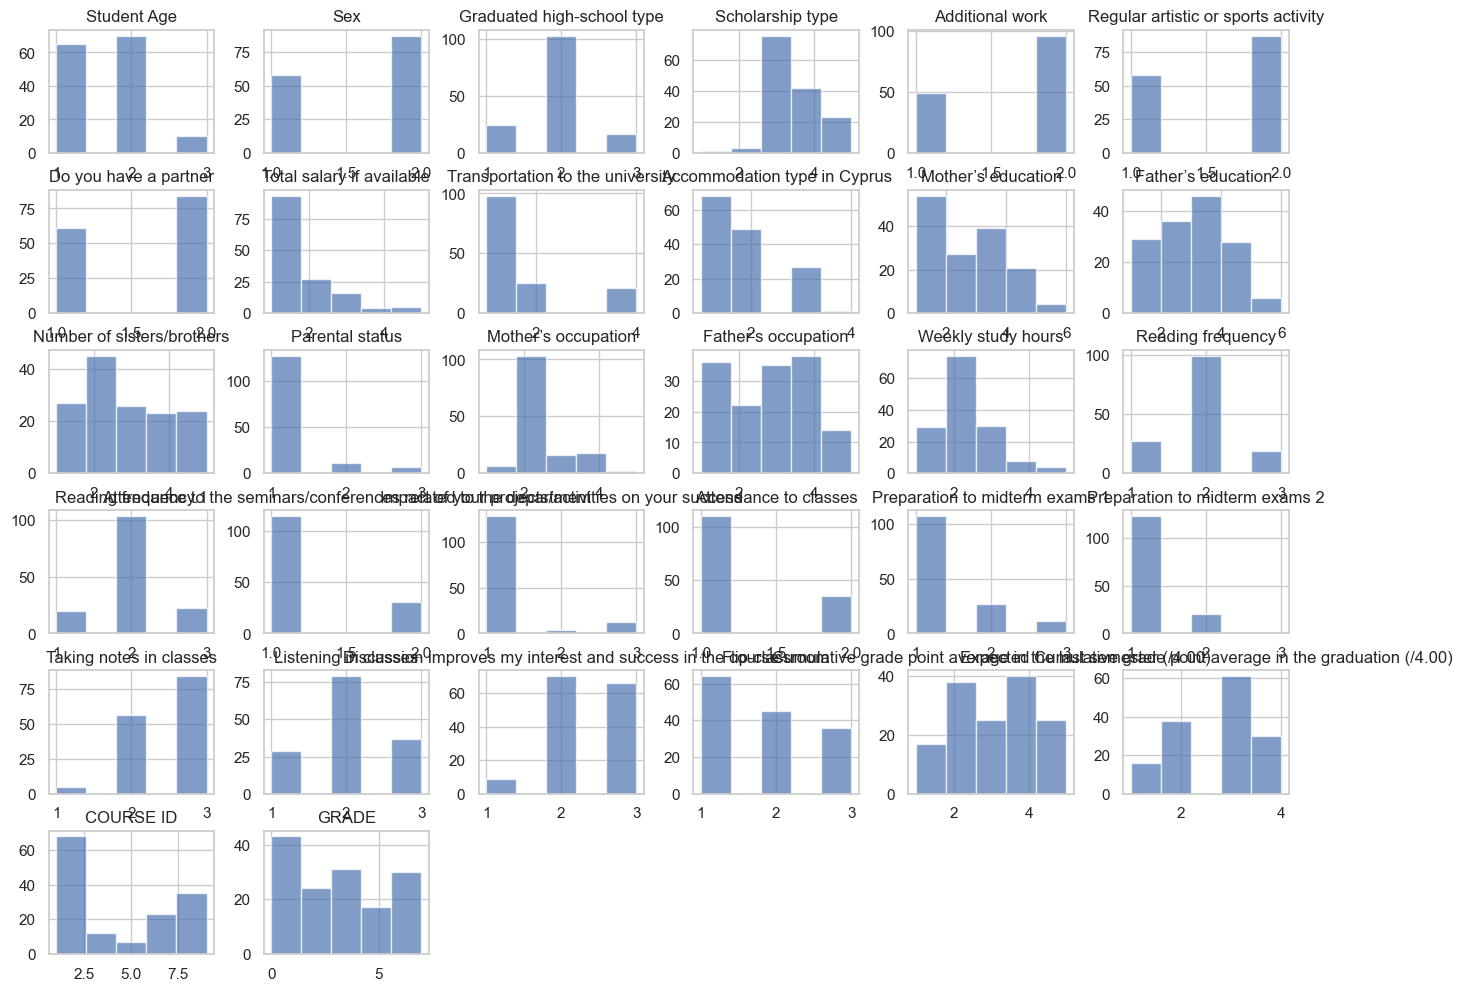

In [226]:
df.hist(alpha = 0.7, figsize=(16,12), bins=5);